In [191]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [193]:
X_stance=pd.Series([1,1,-1,1,-1,1,-1,-1],name='Stance')
X_focus=pd.Series([1,-1,1,-1,-1,1,-1,1],name='Focus')
X_hand=pd.Series([-1,-1,1,-1,1,1,-1,-1],name="Hand_Placement")
Y=pd.Series([50,20,60,50,50,50,60,40],name="Accuracy")

In [195]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
DF=pd.concat([X_stance,X_focus,X_hand,Y],axis='columns')
DF

,Stance,Focus,Hand_Placement,Accuracy
0,1,1,-1,50
1,1,-1,-1,20
2,-1,1,1,60
3,1,-1,-1,50
4,-1,-1,1,50
5,1,1,1,50
6,-1,-1,-1,60
7,-1,1,-1,40


In [197]:
model=ols('Accuracy~Stance*Focus+Stance*Hand_Placement+Focus*Hand_Placement',data=DF)
results1=model.fit()  
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               Accuracy   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                 -1.739
Method:                 Least Squares   F-statistic:                    0.2593
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.903
Time:                        01:51:13   Log-Likelihood:                -27.471
No. Observations:                   8   AIC:                             68.94
Df Residuals:                       1   BIC:                             69.50
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.75

In [199]:
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF).fit()
results2=model.summary2()
print(results2)

                Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.276 
Dependent Variable: Accuracy         AIC:                67.9200
Date:               2025-04-15 01:51 BIC:                68.2378
No. Observations:   8                Log-Likelihood:     -29.960
Df Model:           3                F-statistic:        0.4954 
Df Residuals:       4                Prob (F-statistic): 0.705  
R-squared:          0.271            Scale:              209.62 
----------------------------------------------------------------
                 Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------
Intercept       48.2692   5.3120  9.0868 0.0008  33.5207 63.0177
Stance          -4.2308   5.3120 -0.7965 0.4704 -18.9793 10.5177
Focus            1.7308   5.3120  0.3258 0.7609 -13.0177 16.4793
Hand_Placement   3.0769   5.6788  0.5418 0.6167 -12.6899 18.8437
------------------------------------------

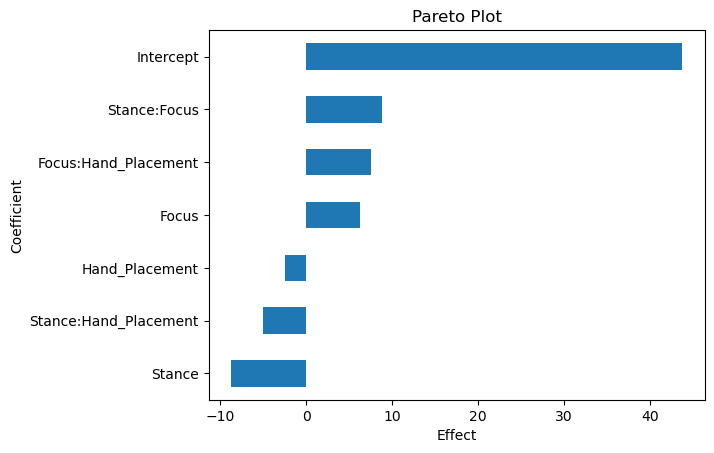

In [201]:
plt.clf()
ordered_coefficients = results1.params
ordered_coefficients=ordered_coefficients.sort_values(axis=0, ascending=True)
ordered_coefficients.plot.barh()
plt.title('Pareto Plot')
plt.xlabel('Effect')
plt.ylabel('Coefficient')
plt.show()

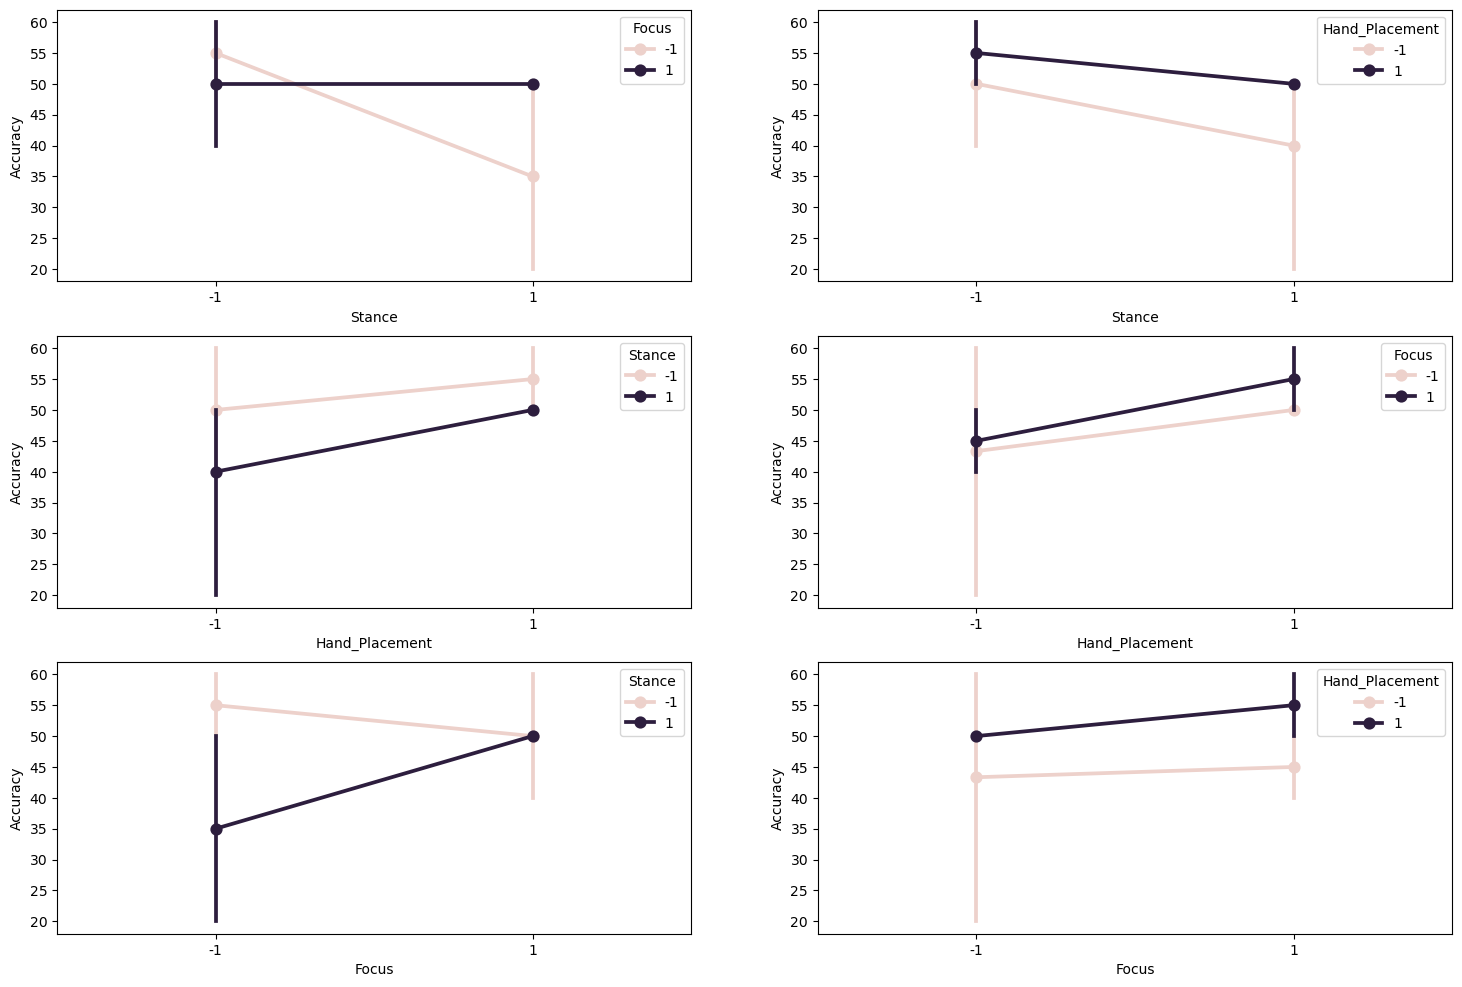

In [203]:
#interaction plots
fig, ax =plt.subplots(3,2)
fig.set_size_inches(18, 12)
sns.pointplot(x='Stance',y='Accuracy',hue='Focus',data=DF,ax=ax[0,0])
sns.pointplot(x='Stance',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[0,1])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Stance',data=DF,ax=ax[1,0])
sns.pointplot(x='Hand_Placement',y='Accuracy',hue='Focus',data=DF,ax=ax[1,1])
sns.pointplot(x='Focus',y='Accuracy',hue='Stance',data=DF,ax=ax[2,0])
sns.pointplot(x='Focus',y='Accuracy',hue='Hand_Placement',data=DF,ax=ax[2,1])
plt.show()

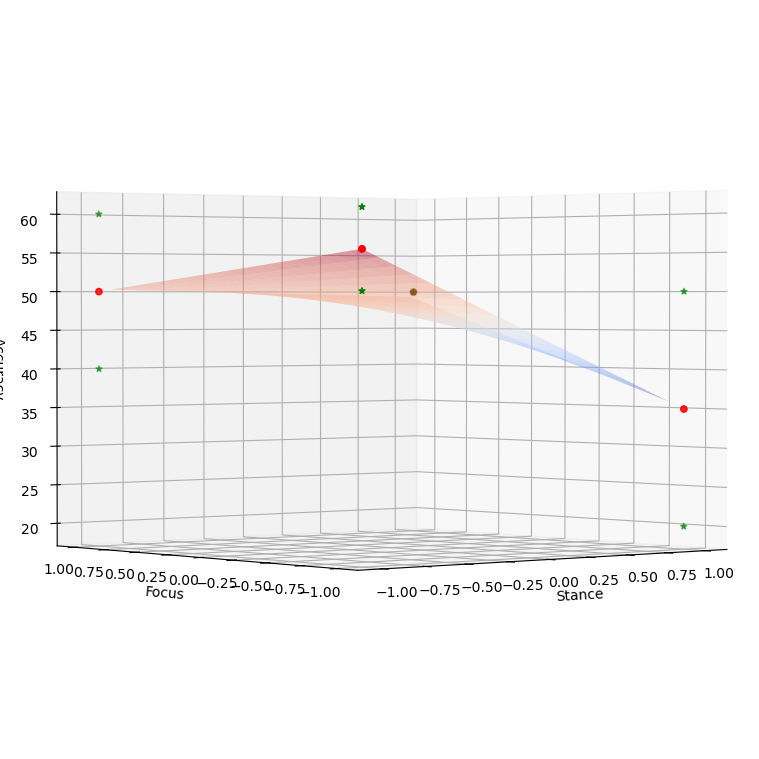

In [204]:
# Contour plot for data between Stance and Focus 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Focus']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})

model3=ols('Accuracy~Stance*Focus',data=DF)
results3=model3.fit()

zS=results3.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results3.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


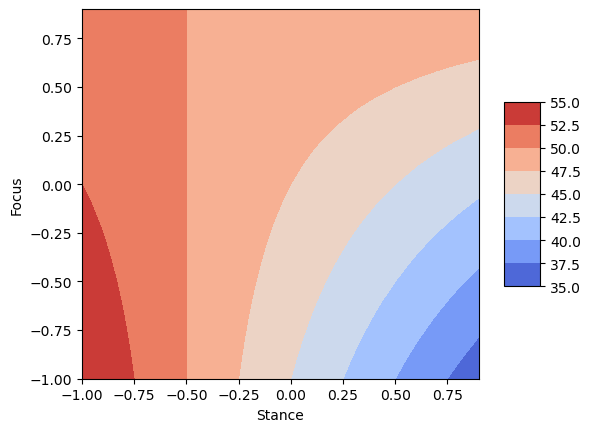

In [205]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults3=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults3,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Focus")
plt.show()


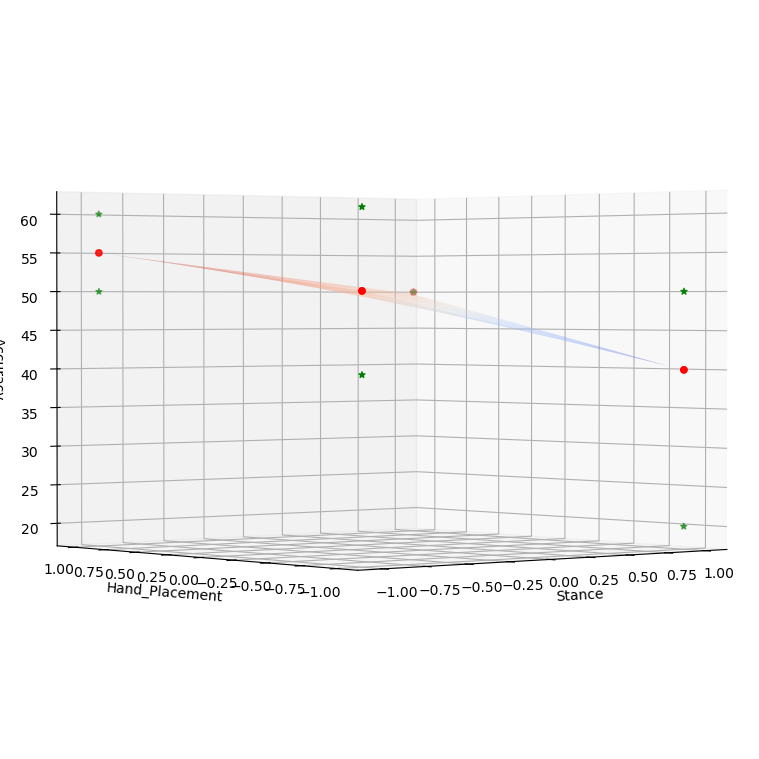

In [207]:
# Contour plot for data between Stance and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Stance']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x1: xS.ravel(), x3:yS.ravel()})

model4=ols('Accuracy~Stance*Hand_Placement',data=DF)
results4=model4.fit()

zS=results4.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results4.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Stance")
ax.set_ylabel("Hand_Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


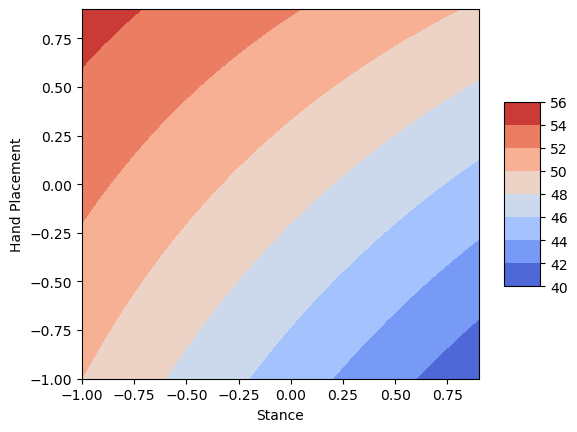

In [210]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults4=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults4,shrink=0.5, aspect=5)
ax.set_xlabel("Stance")
ax.set_ylabel("Hand Placement")
plt.show()


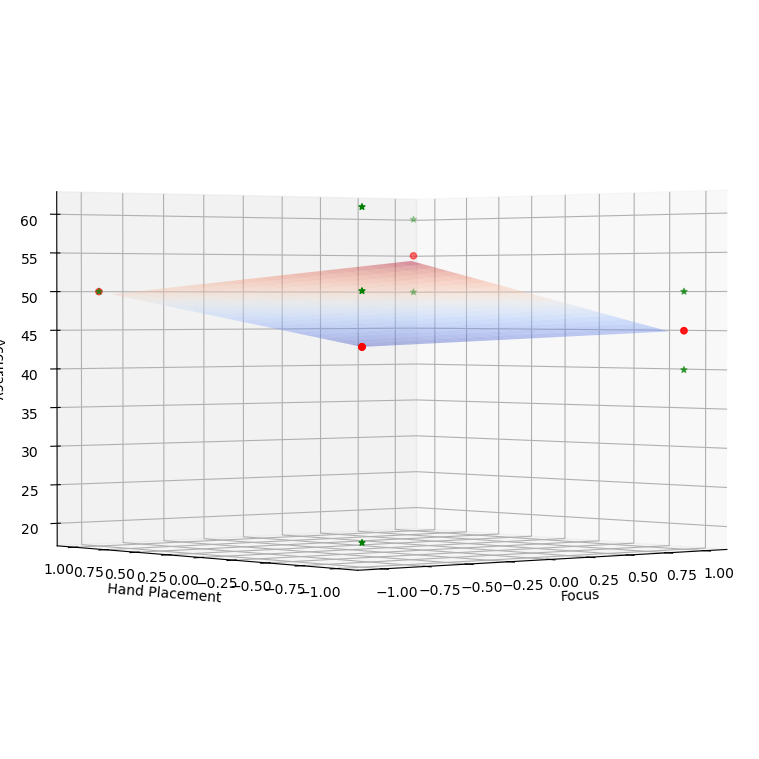

In [212]:
# Contour plot for data between Focus and Hand Placement 
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df=DF
x=df['Focus']
y=df['Hand_Placement']
z=df['Accuracy']
model=ols('Accuracy~Stance+Focus+Hand_Placement',data=DF)
x1,x2,x3=model.exog_names[1:]

x_surf=np.arange(-1,1,.1)
y_surf=np.arange(-1,1,.1)
xS,yS=np.meshgrid(x_surf,y_surf)
exog=pd.DataFrame({x2: xS.ravel(), x3:yS.ravel()})

model5=ols('Accuracy~Focus*Hand_Placement',data=DF)
results5=model5.fit()

zS=results5.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results5.fittedvalues.values,label="Fitted Values",color="r")

ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
ax.set_zlabel("Accuracy")  # Optional, since you're using a 3D plot

plt.show()


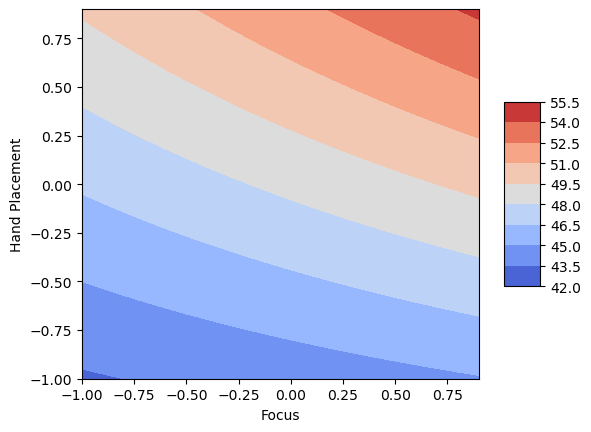

In [214]:
fig=plt.figure()
ax=fig.add_subplot(111)
CountourResults5=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(CountourResults5,shrink=0.5, aspect=5)
ax.set_xlabel("Focus")
ax.set_ylabel("Hand Placement")
plt.show()
